# Convolutional Neural Networks: Application

Creating a numeric classifer using the TF Keras Sequential API

## Preprocess the image data

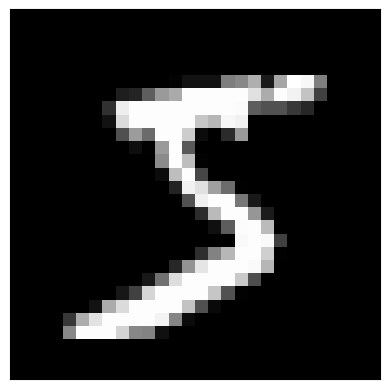

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

<Figure size 640x480 with 0 Axes>

<Axes: >

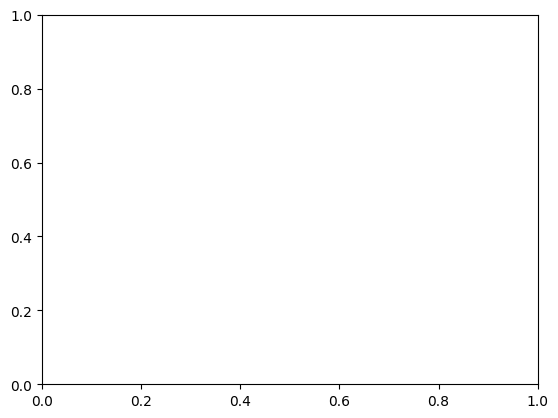

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Display the first image in the dataset as a data matrix
plt.imshow(x_train[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()  # You missed the parentheses to call the function

# Display the values of each pixel in the image before normalization
print("Pixel values:")
for row in x_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display the values of each pixel in the image after normalization
print('\nPixel values after normalization:')
for row in x_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()

# Reshape the images to have a channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

## Building the model

In [2]:
from tensorflow.keras import layers

In [3]:
# Create an input layer
input_layer = layers.Input(shape=(28,28,1)) # 28x28 pixel images with 1 color channel (grayscale)

# Build the CNN model
model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'),  # convulational layer
        layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'), # convulational layer
    layers.MaxPooling2D(), # pooling layer
    layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'), # convulational layer
    layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'), # convulational layer
    layers.MaxPooling2D(), # pooling layer
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax'),
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                   

## Compile the model

In [5]:
model.compile(
    optimizer='adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])

## Train the model

In [6]:
model.fit(x_train, y_train, epochs = 5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 38s 50ms/step - loss: 0.3642 - accuracy: 0.8858 - val_loss: 0.1252 - val_accuracy: 0.9653
Epoch 2/5
750/750 [==============================] - 37s 49ms/step - loss: 0.1108 - accuracy: 0.9665 - val_loss: 0.0945 - val_accuracy: 0.9733
Epoch 3/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0832 - accuracy: 0.9744 - val_loss: 0.0768 - val_accuracy: 0.9782
Epoch 4/5
750/750 [==============================] - 36s 49ms/step - loss: 0.0669 - accuracy: 0.9790 - val_loss: 0.0721 - val_accuracy: 0.9799
Epoch 5/5
750/750 [==============================] - 34s 45ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0639 - val_accuracy: 0.9827


## Evaluate the model

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0462 - accuracy: 0.9852
Test Loss 0.046229857951402664
Test Accuracy 0.9851999878883362


## Save the model

In [8]:
model.save("models/digit-recognizer.h5")

c:\Users\usama\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Use the trained model

#### Use a trained model to make a prediction about a single image

In [9]:
# Grab an image from the test dataset
img = x_test[5]

print(img.shape)


(28, 28, 1)


In [12]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [13]:
# apply model on selected image
pred_digit = model.predict(img)
pred_digit

1/1 [==============================] - 0s 158ms/step


array([[5.68114556e-05, 9.99516129e-01, 1.38558726e-05, 1.96643282e-06,
        2.83113710e-04, 1.61344076e-08, 1.41734345e-05, 9.46218934e-05,
        6.71811358e-06, 1.26297828e-05]], dtype=float32)